In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
loan= pd.read_csv('C:\\Users\\LENOVO\\Documents\\loan.csv')

In [3]:
loan.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,3,13,0
1,2,7574516,40,10,single,rented,no,9,13,0
2,3,3991815,66,4,married,rented,no,4,10,0
3,4,6256451,41,2,single,rented,yes,2,12,1
4,5,5768871,47,11,single,rented,no,3,14,1
5,6,6915937,64,0,single,rented,no,0,12,0
6,7,3954973,58,14,married,rented,no,8,12,0
7,8,1706172,33,2,single,rented,no,2,14,0
8,9,7566849,24,17,single,rented,yes,11,11,0
9,10,8964846,23,12,single,rented,no,5,13,0


In [4]:
loan.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,6,11,0
251996,251997,2843572,26,10,single,rented,no,6,11,0
251997,251998,4522448,46,7,single,rented,no,7,12,0
251998,251999,6507128,45,0,single,rented,no,0,10,0
251999,252000,9070230,70,17,single,rented,no,7,11,0


In [5]:
loan.shape

(252000, 10)

In [6]:
loan.isnull()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
251995,False,False,False,False,False,False,False,False,False,False
251996,False,False,False,False,False,False,False,False,False,False
251997,False,False,False,False,False,False,False,False,False,False
251998,False,False,False,False,False,False,False,False,False,False


In [7]:
loan.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


<AxesSubplot:xlabel='Age'>

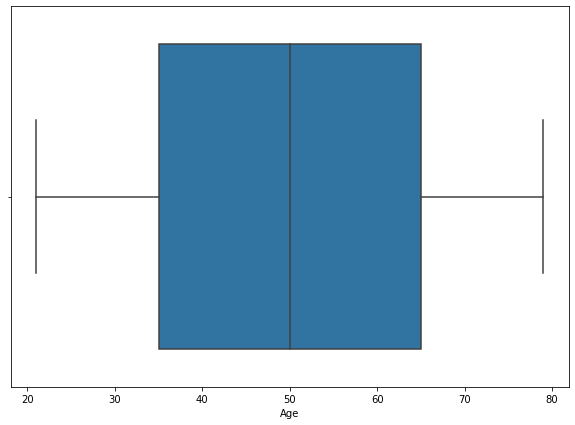

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x=loan['Age'])

<AxesSubplot:xlabel='Age', ylabel='Income'>

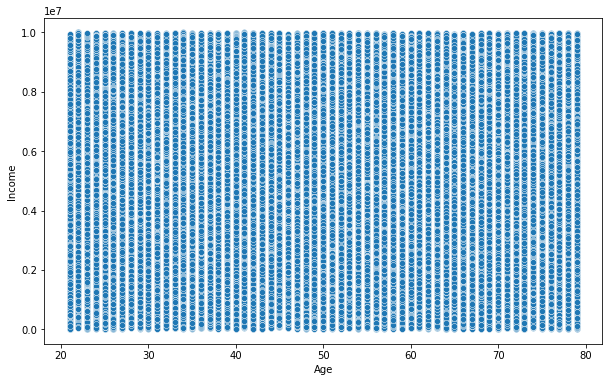

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=loan['Age'],y=loan['Income'])

In [10]:
loan.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [11]:
loan['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [12]:
loan['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [13]:
loan['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [14]:
loan['Married/Single'].replace({"single":1,"married":2},inplace=True)

In [15]:
loan['House_Ownership'].replace({"rented":2,"owned":2,"norent_noown":3},inplace=True)

In [16]:
loan['Car_Ownership'].replace({"no":1,"yes":2},inplace=True)

In [17]:
loan

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,1,3,13,0
1,2,7574516,40,10,1,2,1,9,13,0
2,3,3991815,66,4,2,2,1,4,10,0
3,4,6256451,41,2,1,2,2,2,12,1
4,5,5768871,47,11,1,2,1,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,1,6,11,0
251996,251997,2843572,26,10,1,2,1,6,11,0
251997,251998,4522448,46,7,1,2,1,7,12,0
251998,251999,6507128,45,0,1,2,1,0,10,0


In [18]:
x=loan.drop(['Risk_Flag'],axis=1)

In [19]:
x

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,1303834,23,3,1,2,1,3,13
1,2,7574516,40,10,1,2,1,9,13
2,3,3991815,66,4,2,2,1,4,10
3,4,6256451,41,2,1,2,2,2,12
4,5,5768871,47,11,1,2,1,3,14
...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,1,6,11
251996,251997,2843572,26,10,1,2,1,6,11
251997,251998,4522448,46,7,1,2,1,7,12
251998,251999,6507128,45,0,1,2,1,0,10


In [20]:
y=loan['Risk_Flag']

In [21]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [22]:
#TRAINING AND TESTING OUR DATASET
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=45)

In [23]:
#USING DECISION TREE CLASSIFIER ALGORITHM
dtc=DecisionTreeClassifier(random_state=45)

In [24]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [25]:
dtc_pred = dtc.predict(x_test)

In [26]:
dtc_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
#TESTING THE ACCURACY OF THE MODEL 
print(confusion_matrix(y_test,dtc_pred))

[[146204  19447]
 [ 17463   5886]]


In [28]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89    165651
           1       0.23      0.25      0.24     23349

    accuracy                           0.80    189000
   macro avg       0.56      0.57      0.56    189000
weighted avg       0.81      0.80      0.81    189000



In [29]:
#USING RANDOM FOREST CLASSIFIER ALGORITHM
rfc=RandomForestClassifier(n_estimators=200)

In [30]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
rfc_pred = rfc.predict(x_test)

In [32]:
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
#TO SEE HOW THE MODEL PERFORM
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94    165651
           1       0.76      0.23      0.35     23349

    accuracy                           0.90    189000
   macro avg       0.83      0.61      0.65    189000
weighted avg       0.88      0.90      0.87    189000



In [34]:
#USING KNEAREST NIEGHBOR  ALGORITHM
knn=KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
knn_pred=knn.predict(x_test)

In [37]:
knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
# TO SEE THE ACCURACY OF THE MODEL 
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92    165651
           1       0.23      0.05      0.09     23349

    accuracy                           0.86    189000
   macro avg       0.56      0.51      0.51    189000
weighted avg       0.80      0.86      0.82    189000



In [39]:
# USING VOTING ENSEMBLE TO DECIDE THE BEST MODEL
from sklearn.ensemble import VotingClassifier

In [40]:
estimators=[('Decision',dtc), ('Random',rfc),('KNeighbors',knn)]

In [41]:
VC= VotingClassifier(estimators=estimators,voting='soft')

In [42]:
VC.fit(x_train,y_train)

VotingClassifier(estimators=[('Decision',
                              DecisionTreeClassifier(random_state=45)),
                             ('Random',
                              RandomForestClassifier(n_estimators=200)),
                             ('KNeighbors', KNeighborsClassifier())],
                 voting='soft')

In [43]:
vc_pred= VC.predict(x_test)

In [44]:
vc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
print(classification_report(y_test,vc_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    165651
           1       0.49      0.15      0.23     23349

    accuracy                           0.88    189000
   macro avg       0.69      0.56      0.58    189000
weighted avg       0.84      0.88      0.85    189000



In [46]:
#USING BAGGING ENSEMBLE
from sklearn.ensemble import BaggingClassifier

In [47]:
BC= BaggingClassifier(base_estimator=dtc,n_estimators=10)

In [48]:
BC.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45))

In [49]:
bc_pred=BC.predict(x_test)

In [50]:
bc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,bc_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    165651
           1       0.36      0.06      0.11     23349

    accuracy                           0.87    189000
   macro avg       0.62      0.52      0.52    189000
weighted avg       0.82      0.87      0.83    189000



In [52]:
# USING STACKING ENSEMBLE 
from sklearn.ensemble import StackingClassifier

In [53]:
SR= StackingClassifier(estimators=estimators,final_estimator=dtc)

In [54]:
SR.fit(x_train,y_train)

StackingClassifier(estimators=[('Decision',
                                DecisionTreeClassifier(random_state=45)),
                               ('Random',
                                RandomForestClassifier(n_estimators=200)),
                               ('KNeighbors', KNeighborsClassifier())],
                   final_estimator=DecisionTreeClassifier(random_state=45))

In [55]:
sr_pred=SR.predict(x_test)

In [56]:
sr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
print(classification_report(y_test,sr_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    165651
           1       0.68      0.27      0.39     23349

    accuracy                           0.89    189000
   macro avg       0.79      0.63      0.67    189000
weighted avg       0.88      0.89      0.87    189000



In [58]:
#USING GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
GBC=GradientBoostingClassifier(n_estimators=100)

In [60]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [61]:
gbc_pred=GBC.predict(x_test)

In [62]:
gbc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    165651
           1       0.71      0.00      0.00     23349

    accuracy                           0.88    189000
   macro avg       0.79      0.50      0.47    189000
weighted avg       0.86      0.88      0.82    189000



In [64]:
# USING VOTING ENSEMBLE TO DECIDE THE BEST MODEL
from sklearn.ensemble import VotingClassifier

In [67]:
estimators=[('Voting',VC), ('Bagging',BC),('Stacking',SR),('Gradient',GBC)]

In [68]:
VC= VotingClassifier(estimators=estimators,voting='hard')

In [69]:
VC.fit(x_train,y_train)

VotingClassifier(estimators=[('Voting',
                              VotingClassifier(estimators=[('Decision',
                                                            DecisionTreeClassifier(random_state=45)),
                                                           ('Random',
                                                            RandomForestClassifier(n_estimators=200)),
                                                           ('KNeighbors',
                                                            KNeighborsClassifier())],
                                               voting='soft')),
                             ('Bagging',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45))),
                             ('Stacking',
                              StackingClassifier(estimators=[('Decision',
                                                              DecisionTreeClassifier(random_state=45)),
                      

In [71]:
final_pred=VC.predict(x_test)

In [72]:
final_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    165651
           1       0.84      0.03      0.05     23349

    accuracy                           0.88    189000
   macro avg       0.86      0.51      0.50    189000
weighted avg       0.87      0.88      0.83    189000



In [77]:
# pickle to save model
import pickle

In [78]:
with open('loan.plk','wb') as f:
    pickle.dump(loan, f, protocol=pickle.HIGHEST_PROTOCOL)